In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
# Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [9]:
df.head((10))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [10]:
print(df.shape)

(5110, 12)


In [11]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# Investigate and predict the missing BMI Value.

In [12]:
"""
# Check the correlation between BMI and other variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Impute missing BMI values using linear regression
from sklearn.linear_model import LinearRegression

df.gender = df.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
bmi_data = df[~df.bmi.isna()]
missing_bmi_data = df[df.bmi.isna()]

X_train = bmi_data[['age','gender','bmi']].copy()
y_train = bmi_data['bmi']

X_test = missing_bmi_data[['age','gender','bmi']].copy()
y_test = missing_bmi_data['bmi']

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicting the missing BMI values
predicted_bmi = lr_model.predict(X_test_scaled)

# Replacing the missing values with predicted values
stroke_data.loc[stroke_data['bmi'].isna(), 'bmi'] = predicted_bmi
"""

"\n# Check the correlation between BMI and other variables\ncorr_matrix = df.corr()\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm')\nplt.show()\n\n# Impute missing BMI values using linear regression\nfrom sklearn.linear_model import LinearRegression\n\ndf.gender = df.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)\nbmi_data = df[~df.bmi.isna()]\nmissing_bmi_data = df[df.bmi.isna()]\n\nX_train = bmi_data[['age','gender','bmi']].copy()\ny_train = bmi_data['bmi']\n\nX_test = missing_bmi_data[['age','gender','bmi']].copy()\ny_test = missing_bmi_data['bmi']\n\n# Scaling the data\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Training the linear regression model\nlr_model = LinearRegression()\nlr_model.fit(X_train_scaled, y_train)\n\n# Predicting the missing BMI values\npredicted_bmi = lr_model.predict(X_test_scaled)\n\n# Replacing the missing values with predicted values\nstroke_data.loc[stro

In [13]:
df.bmi=df.bmi.fillna(df.bmi.median())

In [14]:
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# Check the datatype, number of non null values and name of each variable in the dataset.

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [16]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Visualize the proportion of Stroke samples in the dataset.

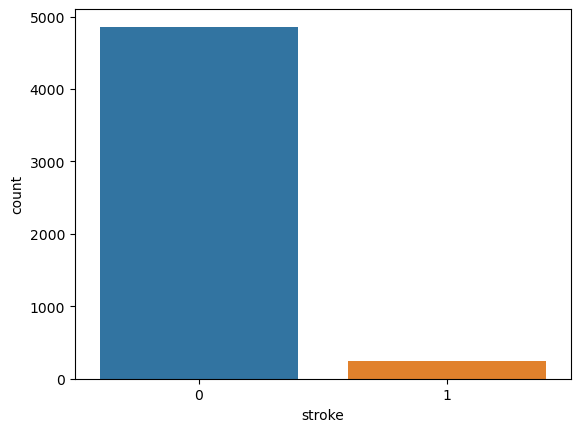

In [17]:
sns.countplot(x='stroke', data=df)
plt.show()

# Visualize the Distribution of Male and Female Ages. Write the Observation.

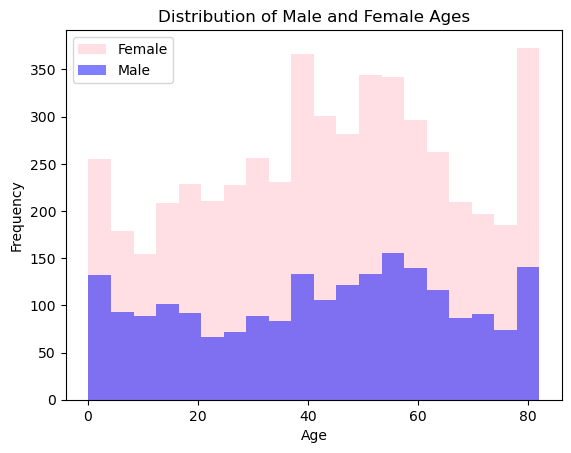

In [18]:
import matplotlib.pyplot as plt

plt.hist(x='age', data=df, bins=20, alpha=0.5, label='Female', color='pink')
plt.hist(x='age', data=df[df['gender'] == 'Male'], bins=20, alpha=0.5, label='Male', color='blue')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Male and Female Ages')
plt.show()

# Visualize the stroke sample based on BMI and Glucose Level

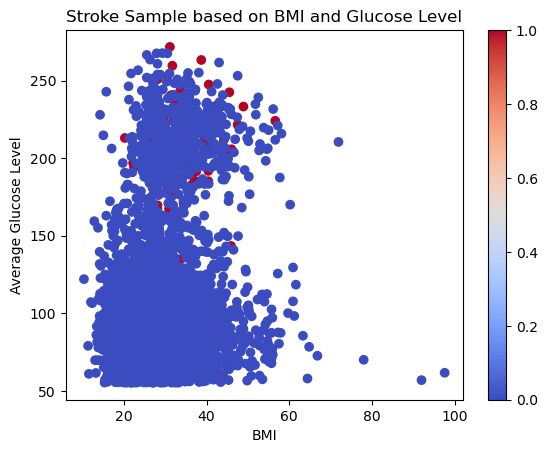

In [19]:
plt.scatter(x='bmi', y='avg_glucose_level', c='stroke', cmap='coolwarm', data=df)
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Stroke Sample based on BMI and Glucose Level')
plt.show()

In [20]:
# To visualize the stroke sample based on BMI and Age, we can use a scatter plot as follows -

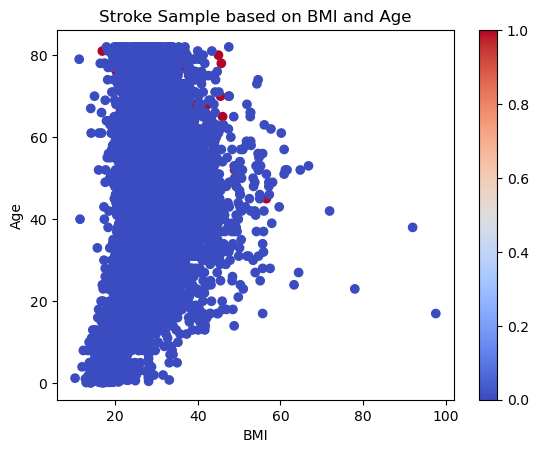

In [21]:
plt.scatter(x='bmi', y='age', c='stroke', cmap='coolwarm', data=df)
plt.colorbar()
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Stroke Sample based on BMI and Age')
plt.show()

To use the pie chart to visualize the proportion of different smoking categories among the stroke population, we can use the following code -

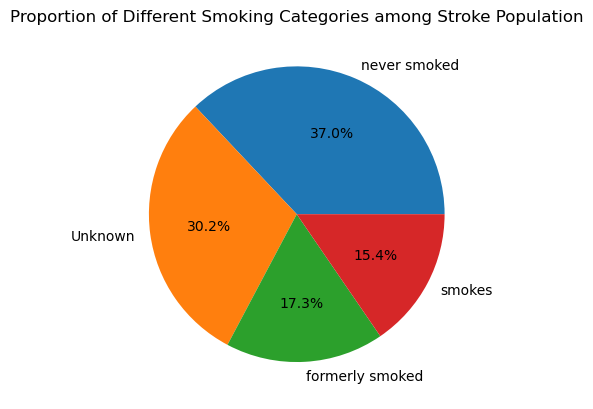

In [22]:
labels = df['smoking_status'].value_counts().index
sizes = df['smoking_status'].value_counts().values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Different Smoking Categories among Stroke Population')
plt.show()

To perform hypothesis testing, we need to first define the null and alternate hypotheses. Let's say we want to test if age, BMI, glucose level, and hypertension are significant variables for predicting stroke. Then the hypotheses would be:
Null hypothesis (H0): Age, BMI, glucose level, and hypertension are not significant variables for predicting stroke.
Alternative hypothesis (HA): Age, BMI, glucose level, and hypertension are significant variables for predicting stroke.
We can use a logistic regression model to test these hypotheses and determine the p-values for each variable. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that the variable is significant in predicting stroke.

In [23]:
from scipy.stats import chi2_contingency

# contingency table of stroke and gender
contingency_table = pd.crosstab(df['stroke'], df['gender'])

# perform chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# print results
print('Chi-Square test results:')
print('    Statistic:', stat)
print('    p-value:', p)
print('    Degrees of freedom:', dof)
print('    Expected values:', expected)

Chi-Square test results:
    Statistic: 0.47258662884530234
    p-value: 0.7895490538408245
    Degrees of freedom: 2
    Expected values: [[2.84810841e+03 2.01194031e+03 9.51272016e-01]
 [1.45891585e+02 1.03059687e+02 4.87279843e-02]]


In [24]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

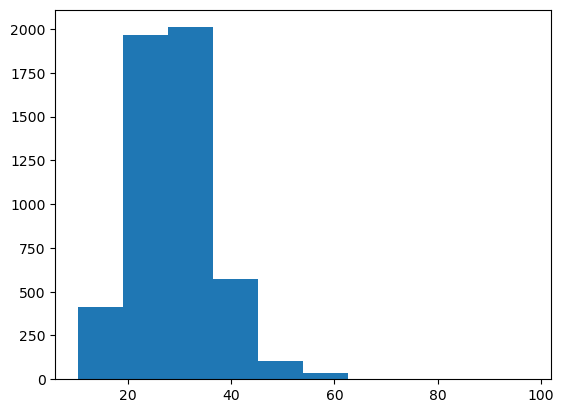

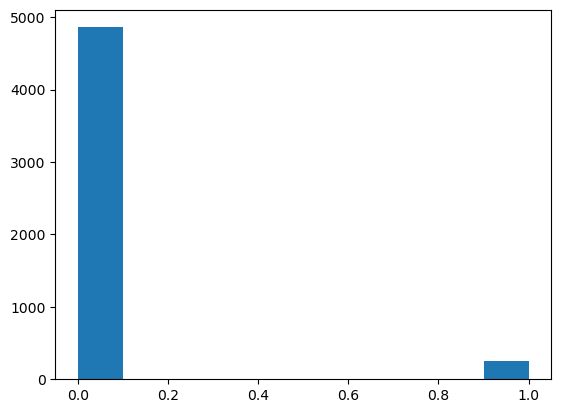

In [25]:
#We can use a histogram to visualize the distribution of the 'bmi' and 'stroke' columns

plt.hist(df['bmi'])
plt.show()

plt.hist(df['stroke'])
plt.show()

We can use the skew() method from the scipy.stats module to find the skewness of each column. If the absolute value of skewness is greater than 1, we can consider the column to be highly skewed

We can use the kurtosis() method from the scipy.stats module to find the kurtosis of each column. If the absolute value of kurtosis is greater than 3, we can consider the column to be highly kurtotic.

In [26]:
from scipy.stats import skew, kurtosis

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    if skew(df[col]) > 1:
        print(f"{col} is highly skewed with skewness value of {skew(df[col])}")
    
for col in numeric_cols:
    if kurtosis(df[col]) > 3:
        print(f"{col} is highly kurtotic with kurtosis value of {kurtosis(df[col])}")

gender is highly skewed with skewness value of 69.45660549825577
hypertension is highly skewed with skewness value of 2.714594511421973
heart_disease is highly skewed with skewness value of 3.9460851899886302
work_type is highly skewed with skewness value of 2.089818061134306
avg_glucose_level is highly skewed with skewness value of 1.571822297397199
bmi is highly skewed with skewness value of 1.0878677778570507
stroke is highly skewed with skewness value of 4.192053480263753
gender is highly kurtotic with kurtosis value of 4914.818009586218
hypertension is highly kurtotic with kurtosis value of 5.369023361442304
heart_disease is highly kurtotic with kurtosis value of 13.571588326647607
bmi is highly kurtotic with kurtosis value of 3.6305759649314915
stroke is highly kurtotic with kurtosis value of 15.573312381391432


We can use a bar chart to visualize the distribution of each variable with respect to the 'stroke' variable.

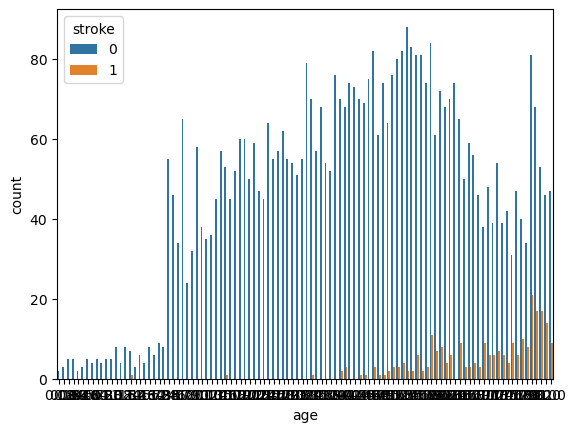

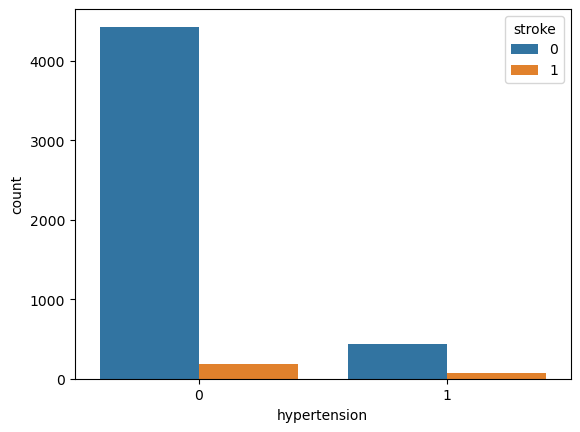

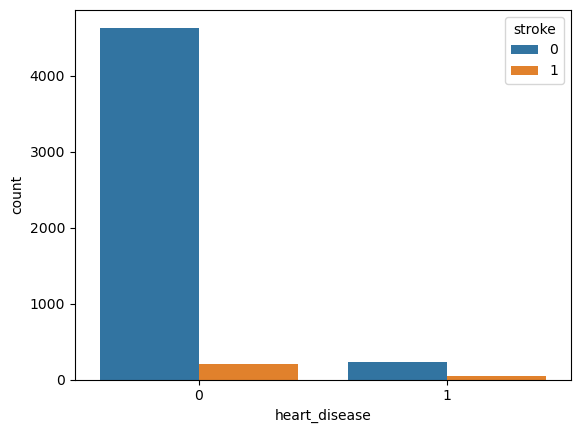

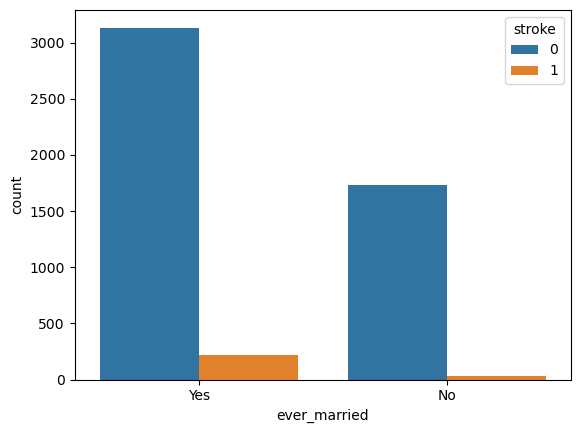

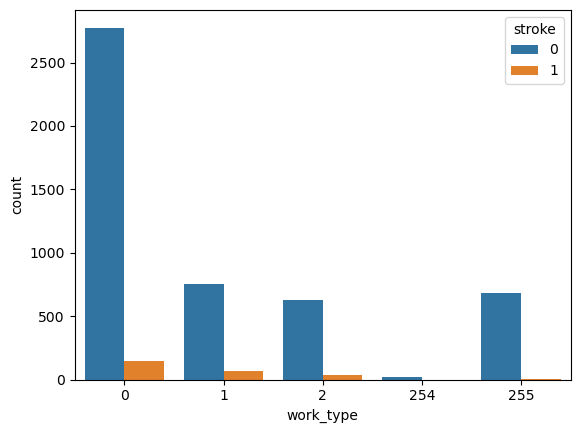

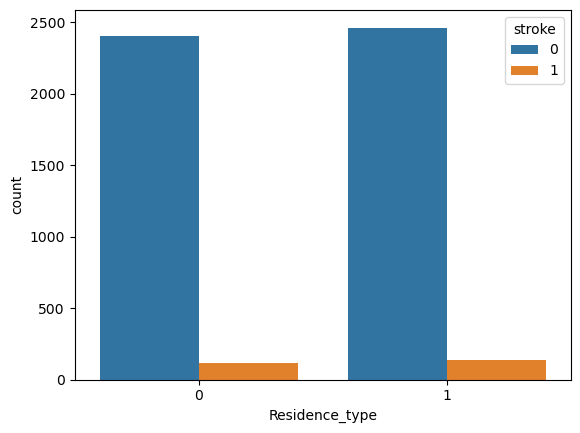

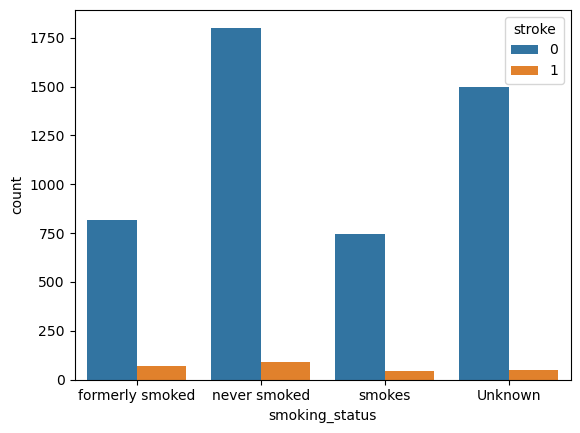

In [27]:
import seaborn as sns

sns.countplot(x='age', hue='stroke', data=df)
plt.show()

sns.countplot(x='hypertension', hue='stroke', data=df)
plt.show()

sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.show()

sns.countplot(x='ever_married', hue='stroke', data=df)
plt.show()

sns.countplot(x='work_type', hue='stroke', data=df)
plt.show()

sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.show()

sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.show()

# # heatmap to visualize the correlation matrix.

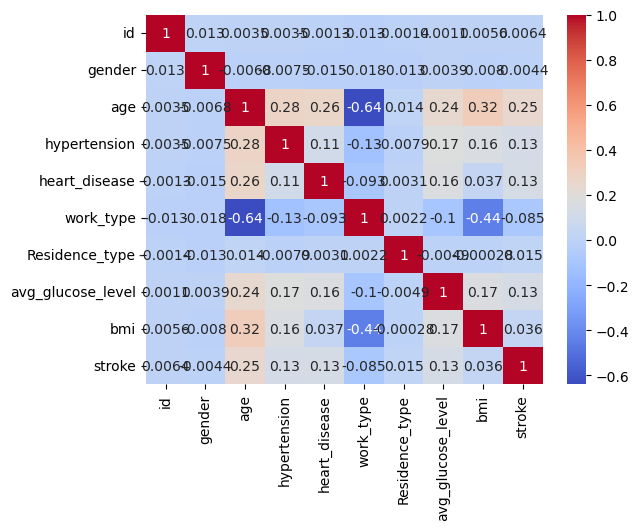

In [28]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio

In [29]:
from sklearn.model_selection import train_test_split

X  = df[['gender','age','hypertension','heart_disease','work_type','avg_glucose_level','bmi']]
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [30]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

If the number of samples for the positive class (stroke=1) is significantly lower than the negative class (stroke=0), then the dataset is imbalanced. In this case, we need to use a technique such as oversampling the minority class or undersampling the majority class to balance the dataset.

When dealing with imbalanced datasets, we can use different techniques to balance the data, such as:
Undersampling the majority class: randomly removing samples from the majority class to match the number of samples in the minority class.
Oversampling the minority class: adding copies of the minority class to increase the number of samples to match the majority class.
Synthetic data generation: generating new samples for the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).
In our case, since the number of samples for the positive class (stroke=1) is significantly lower than the negative class (stroke=0), we can use oversampling or synthetic data generation techniques to balance the dataset. One of the commonly used techniques is the Synthetic Minority Over-sampling Technique (SMOTE), which creates synthetic samples for the minority class by interpolating between existing samples. This technique can be implemented using the imblearn library in Python.
Here's an example code to balance the dataset using SMOTE:

In [31]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to balance the data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Convert balanced data back to pandas dataframe
df_balanced = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['stroke'])], axis=1)
df_balanced.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,0,228.69,36.6,1
1,1,61.0,0,0,1,202.21,28.1,1
2,0,80.0,0,1,0,105.92,32.5,1
3,1,49.0,0,0,0,171.23,34.4,1
4,1,79.0,1,0,1,174.12,24.0,1


In the code above, we first separate the features and target variable from the original dataset. Then, we apply SMOTE using fit_resample() function, which creates synthetic samples for the minority class to match the number of samples in the majority class. Finally, we convert the balanced data back to pandas dataframe for further analysis.


## Model Selection/hyperparameter tuning

In [32]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df_balanced.drop('stroke', axis=1)
y = df_balanced['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
lr = LogisticRegression()

# Fit the model on training data
lr.fit(X_train, y_train)

# Predict on testing data
y_pred = lr.predict(X_test)

# Print accuracy score
print('Accuracy:', lr.score(X_test, y_test))

Accuracy: 0.7974293059125964


C:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
confusion_matrix(y_test, y_pred)

array([[736, 239],
       [155, 815]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       975
           1       0.77      0.84      0.81       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945

Accuracy Score:  0.7974293059125964
F1 Score:  0.8053359683794467
